# State of Data 2021

### Diferenças de gênero na área de Ciência de Dados

#### Sugestões de análises:
- Diferenças gerais entre homens x mulheres de diferentes regiões do país.
    - idade
    - escolaridade / área de formação
    - experiência
    - empregados/desempregados
    - nível de cargo que ocupam
    - remuneração
    
- Diferenças na satisfação do emprego
- Forma de trabalho / ideal para entrevistado

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

A fazer:
- Histograma idade (Marília já fez) separado por genero
- boxplot de idade separado por genero

- escolaridade entre homens e mulheres

- empregados x desempregados entre homens e mulheres
- cargo/senioridade entre homens e mulheres
- Variação de salário entre homens e mulheres por cargo/senioridade


In [34]:
df = pd.read_csv('state_of_data_tradado.csv')
print(df.shape)
df.head()

(2645, 44)


,id,Idade,Faixa idade,Genero,Regiao onde mora,Regiao de origem,Mudou de Estado?,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,...,Flexibilidade de trabalho remoto,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Nordeste,Sudeste,0,Pós-graduação,Química / Física,Empregado (CLT),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Sul,Sul,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,Sudeste,Sul,0,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Sul,Sul,0,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...


<Axes: xlabel='Idade', ylabel='Count'>

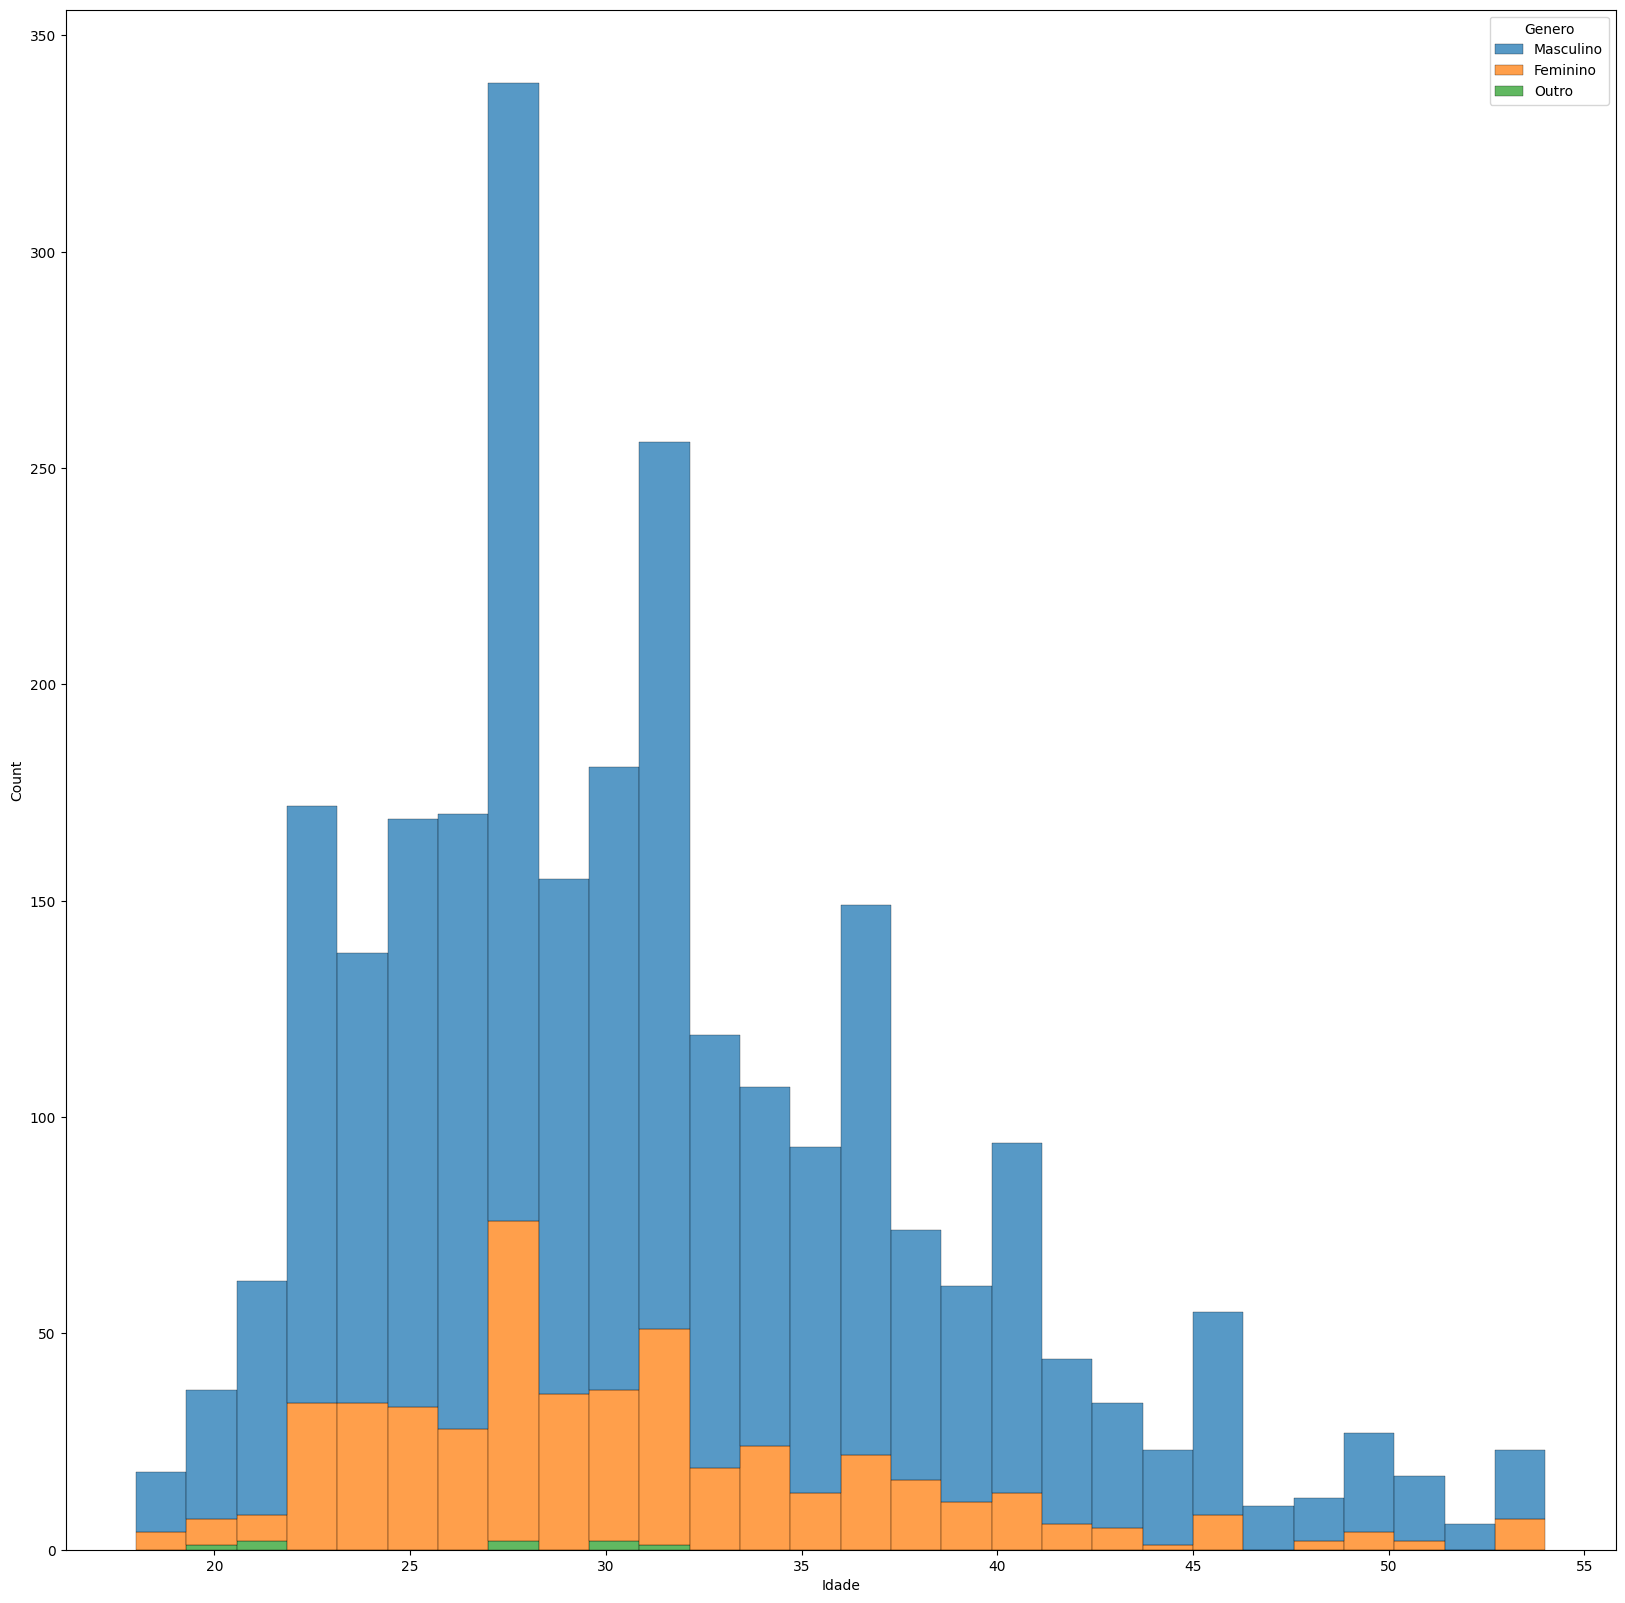

In [7]:
# sns.barplot(df_col_fitro, cmap='viridis', annot=True)
f, ax = plt.subplots(figsize=(20, 20))
sns.histplot(df,
             x="Idade", hue="Genero",
             multiple="stack",
             linewidth = 0.2)

<Axes: xlabel='Count', ylabel='Nivel de Ensino'>

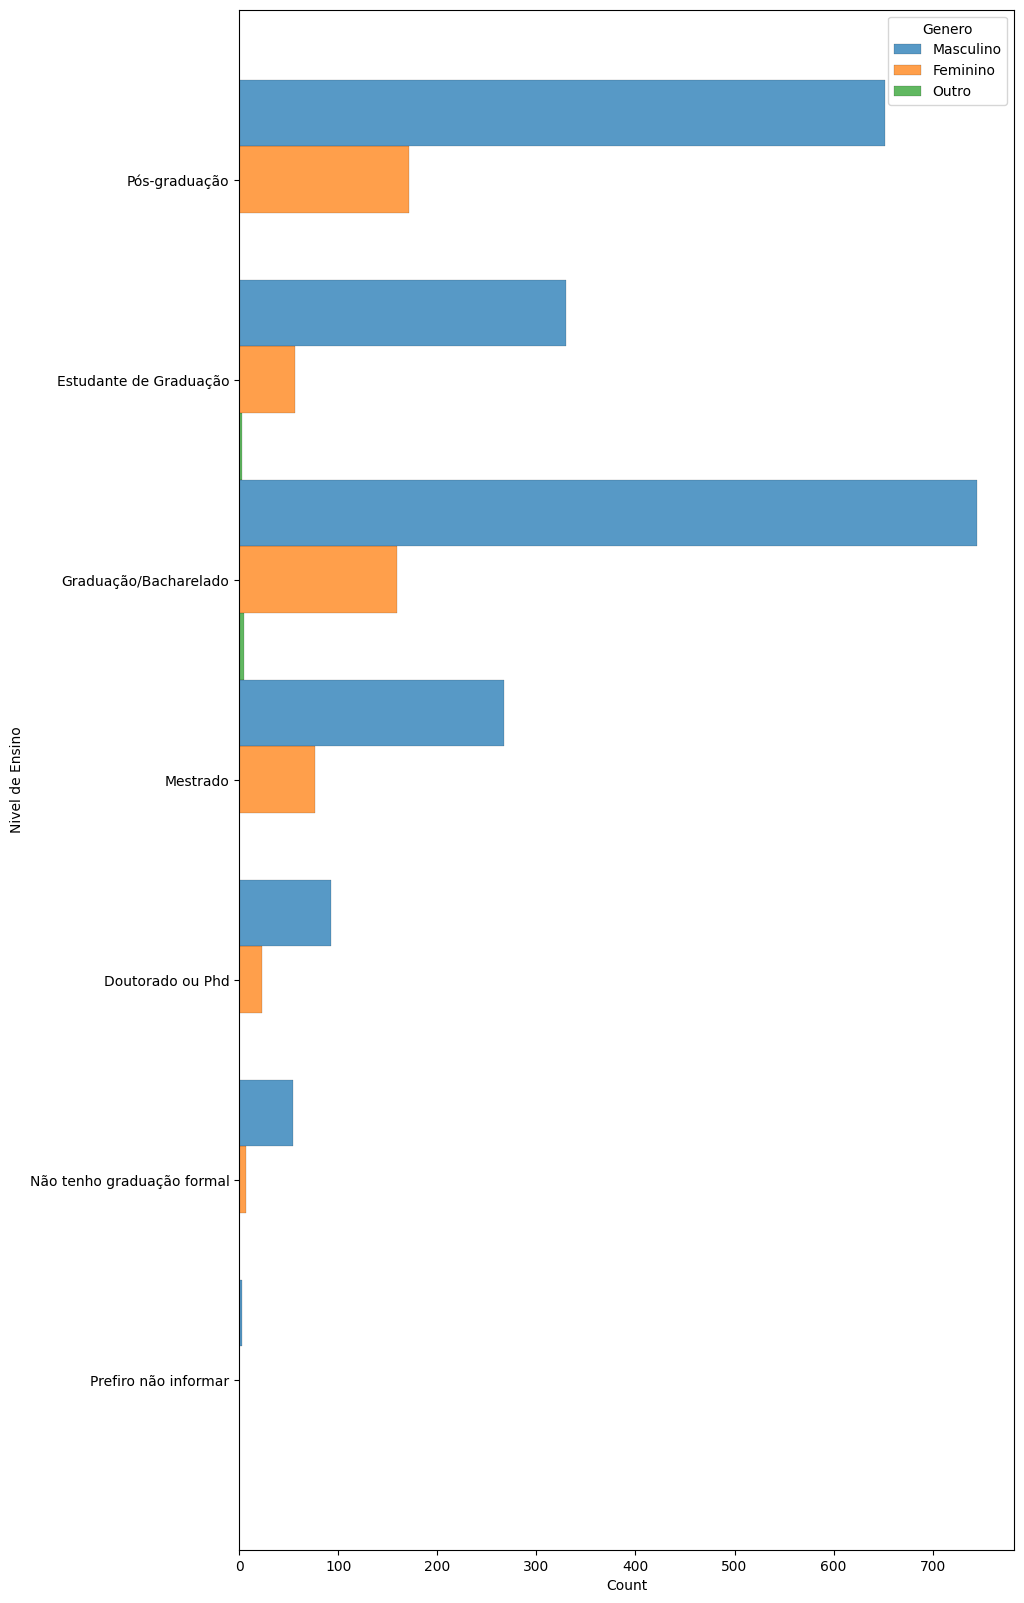

In [27]:
#histograma escolaridade
f, ax = plt.subplots(figsize=(10, 20))
sns.histplot(df,
             y="Nivel de Ensino", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

<Axes: xlabel='Count', ylabel='Qual sua situação atual de trabalho?'>

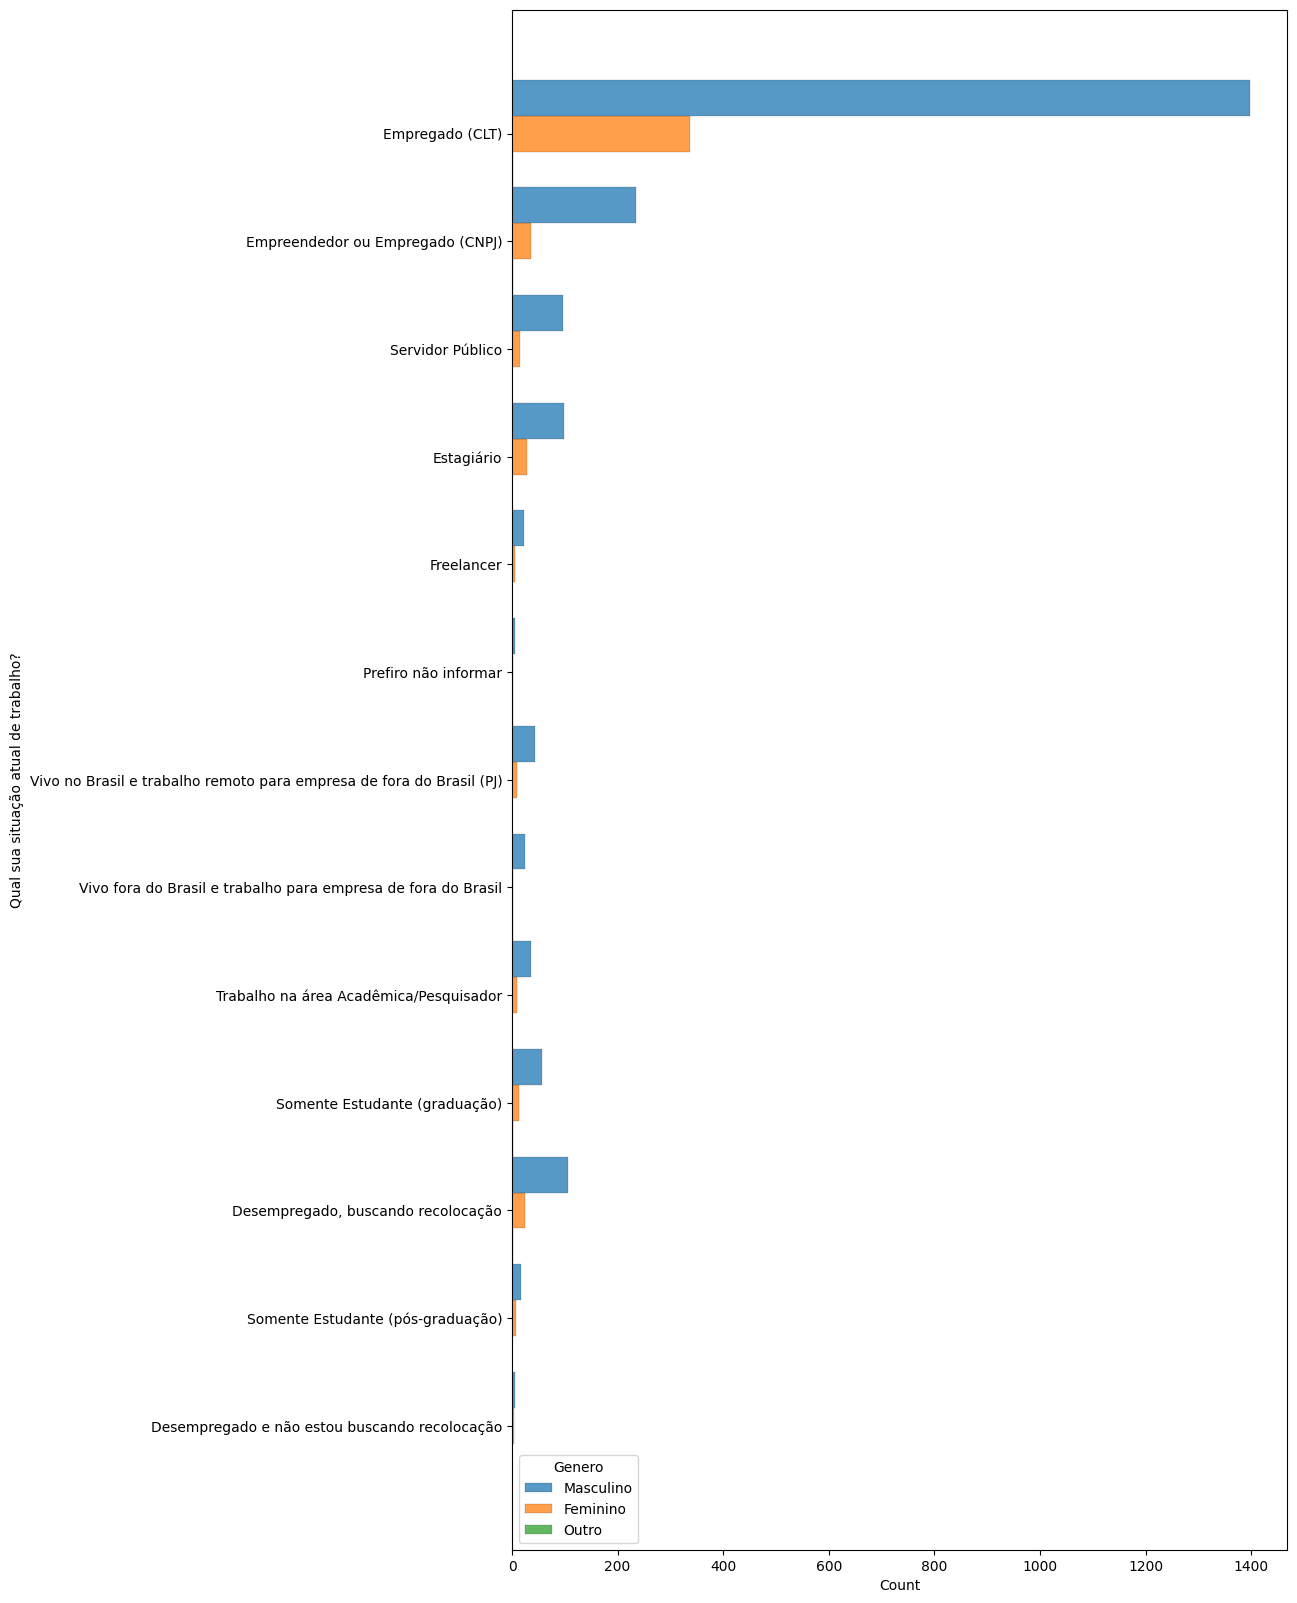

In [48]:
#Histograma Empregados x Desempregados discriminado
f, ax = plt.subplots(figsize=(10, 20))
sns.histplot(df,
             y="Qual sua situação atual de trabalho?", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

<Axes: xlabel='Count', ylabel='Desemprego'>

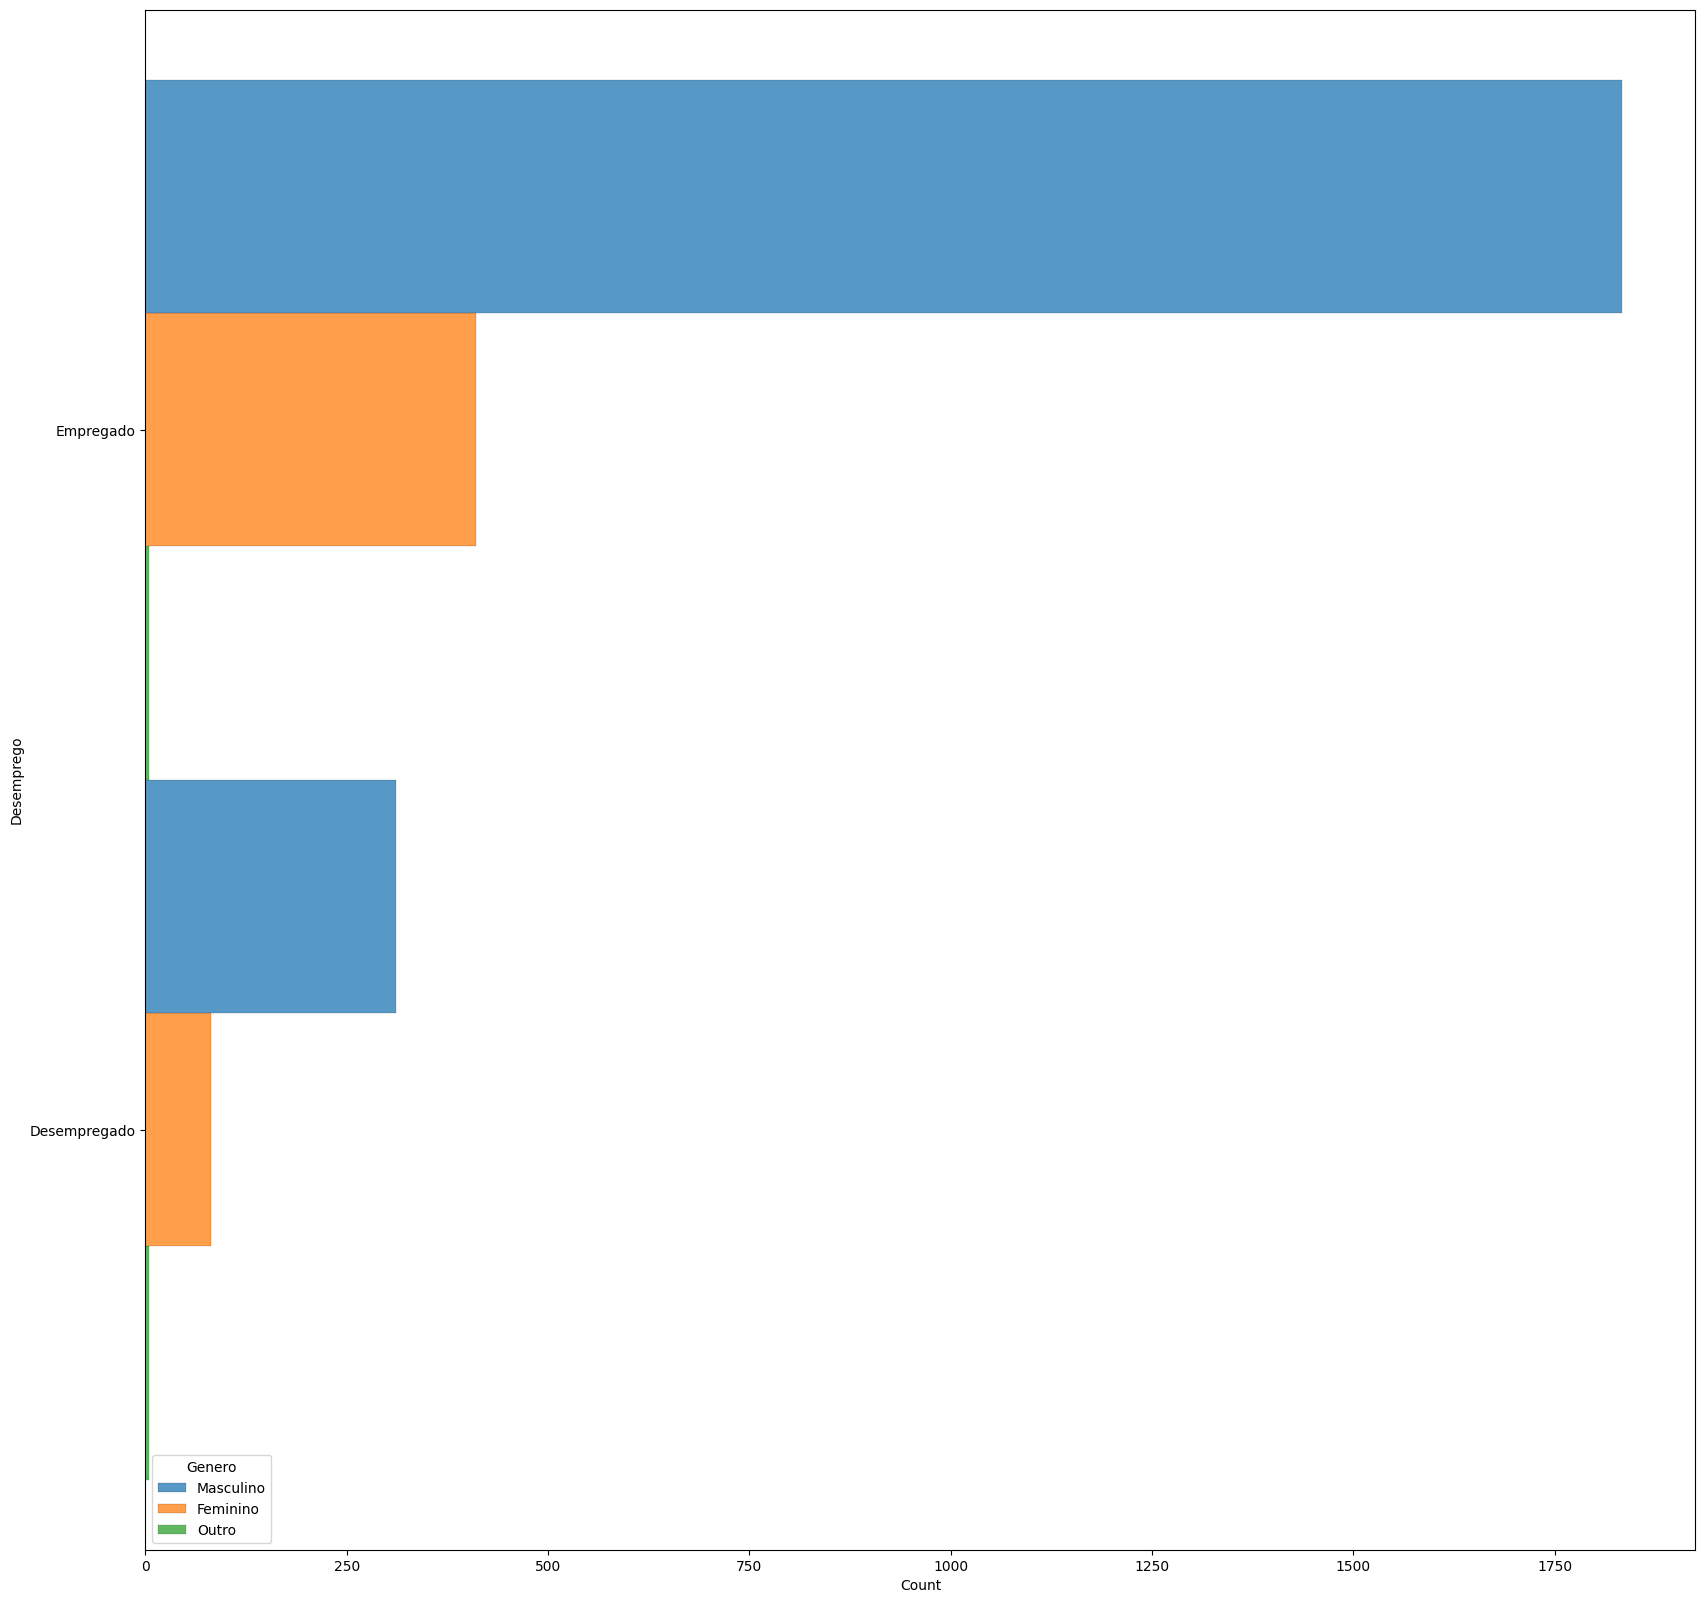

In [50]:
#Histograma Empregados x Desempregados geral

empregado = ['Empregado (CLT)','Empreendedor ou Empregado (CNPJ)','Servidor Público',
 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
 'Trabalho na área Acadêmica/Pesquisador']
def verifica_valor(valor):
    if valor in empregado:
        return 'Empregado'
    else:
        return 'Desempregado'

# Aplicar a função para criar a nova coluna 'ok'
df['Desemprego'] = df['Qual sua situação atual de trabalho?'].apply(verifica_valor)
#Histograma EmpregadosxDesempregados
f, ax = plt.subplots(figsize=(20, 20))
sns.histplot(df,
             y="Desemprego", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

<Axes: xlabel='Count', ylabel='Cargo como Gestor'>

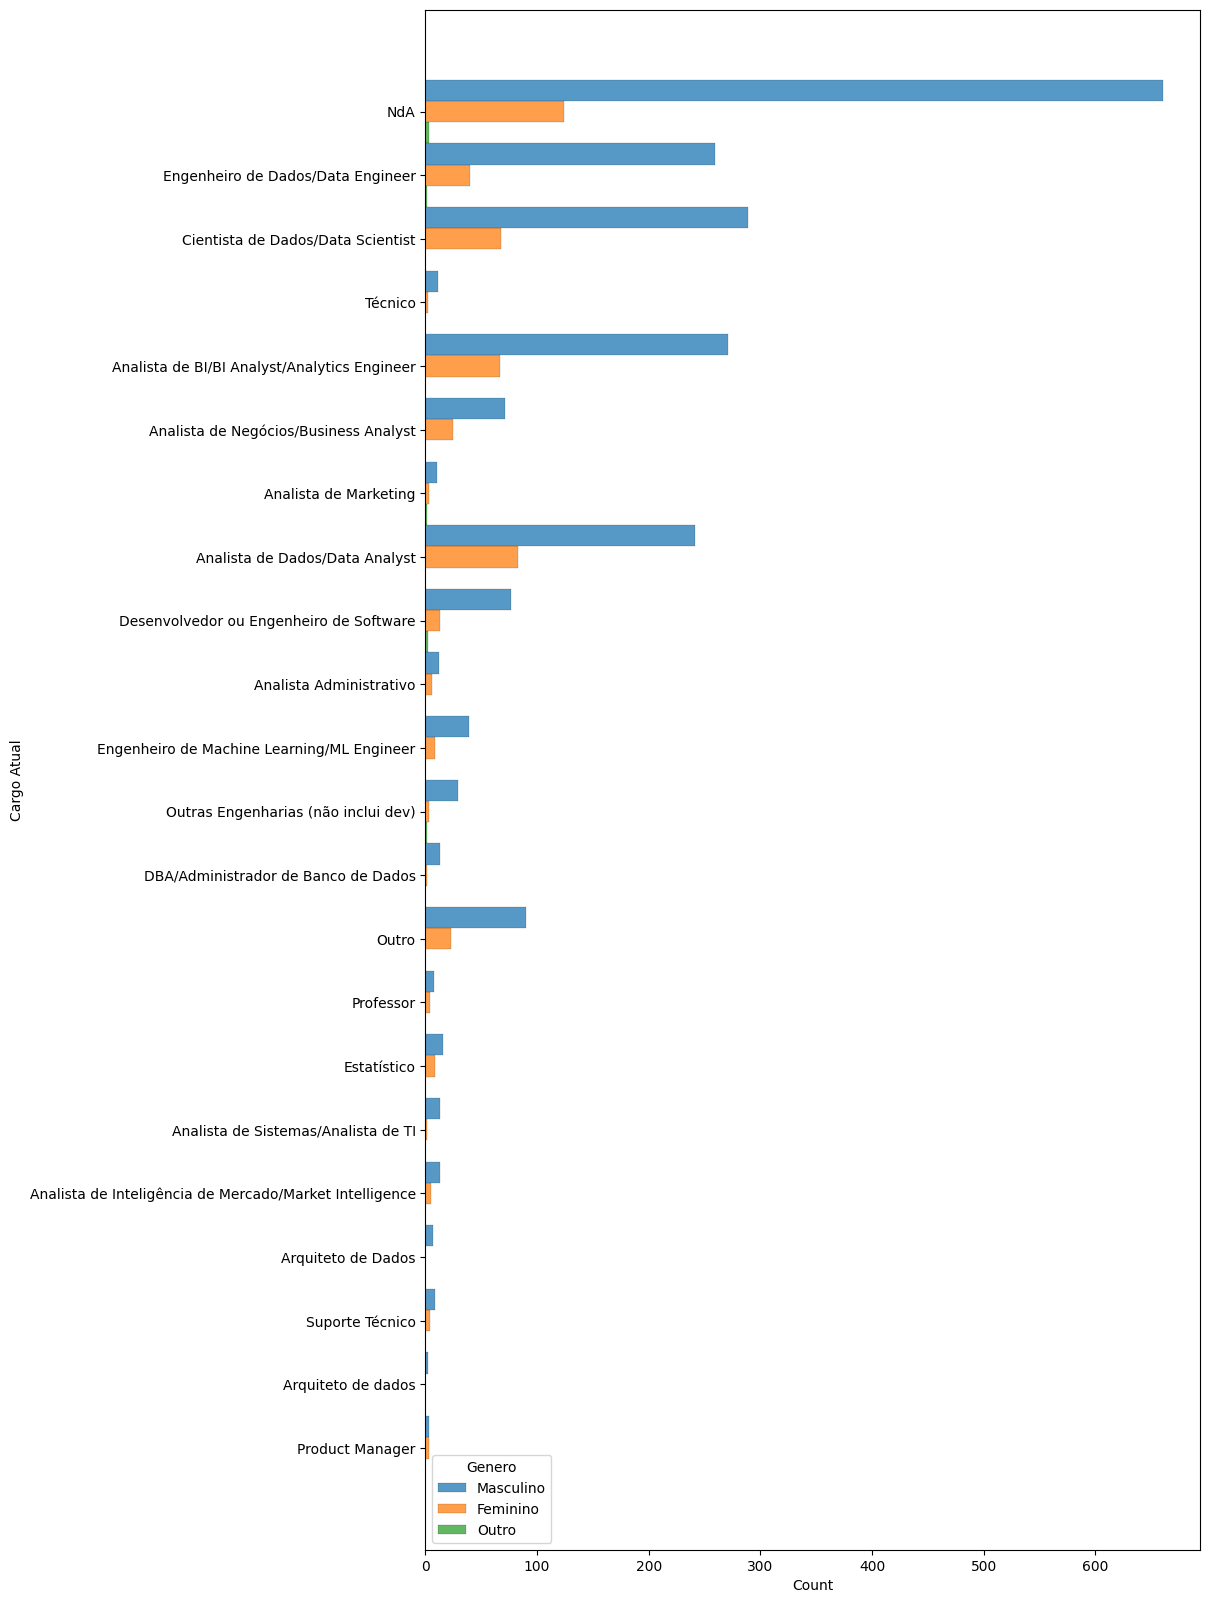

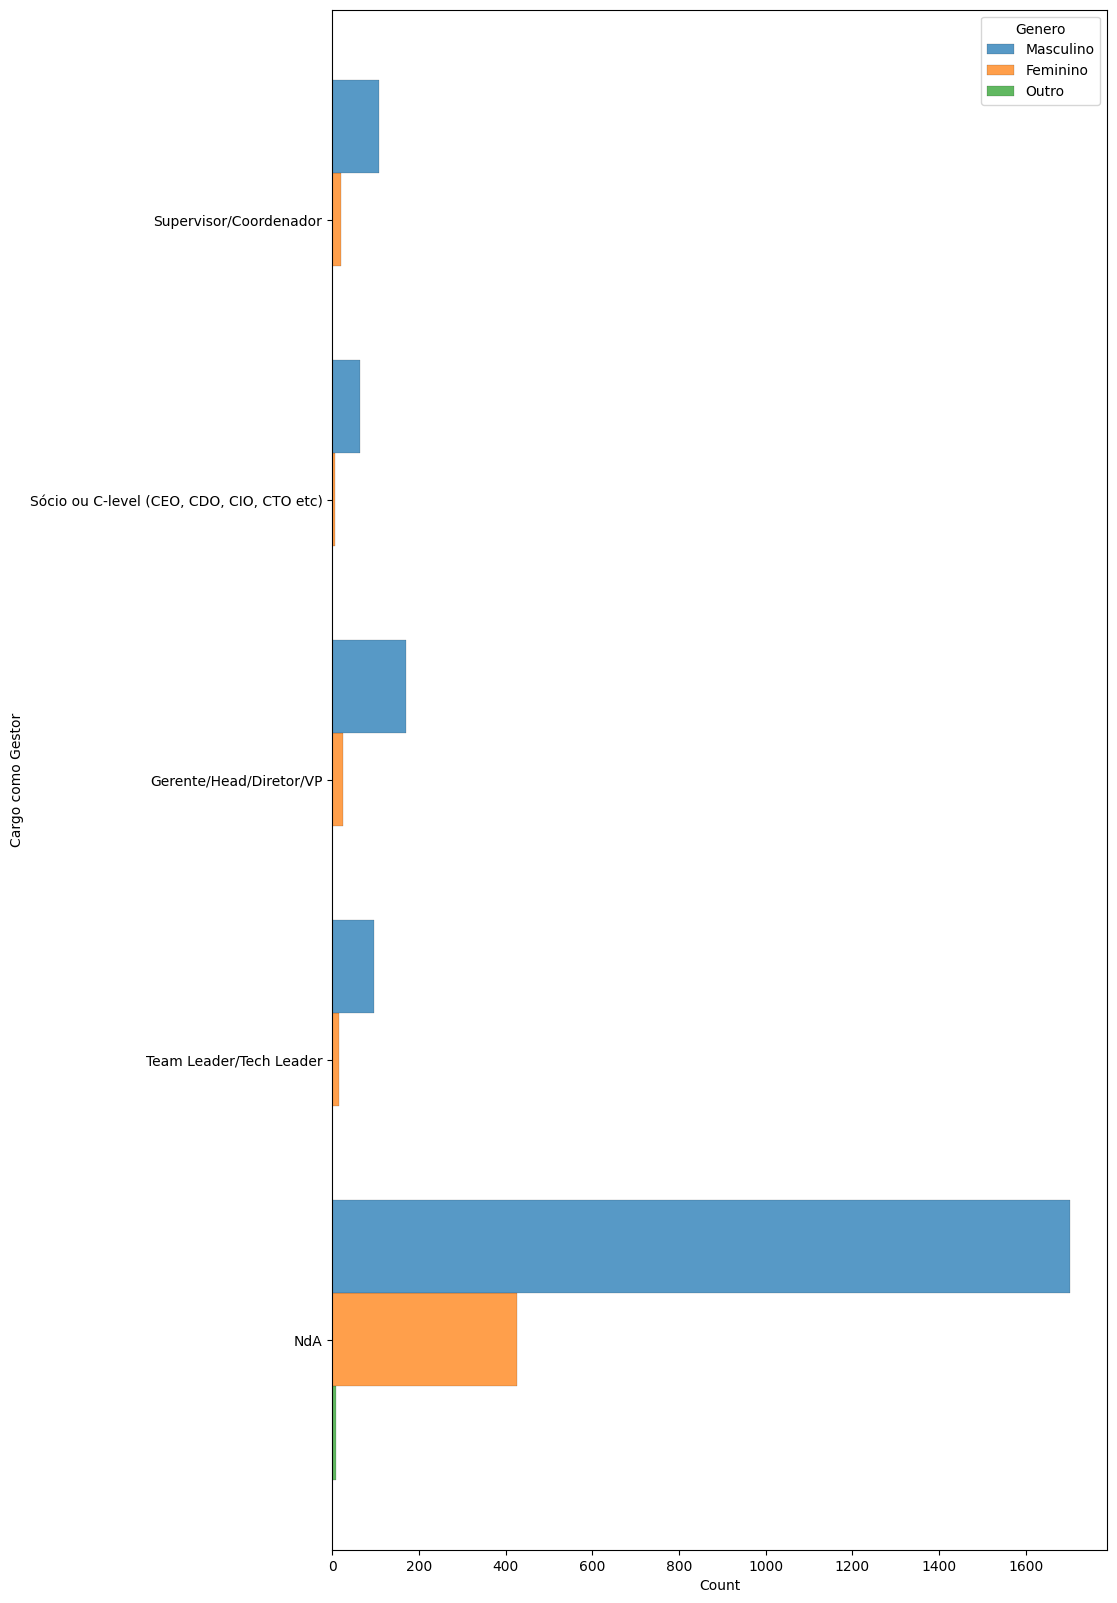

In [37]:
#Histograma cargos entre homens e mulheres

f, ax = plt.subplots(figsize=(10, 20))
sns.histplot(df,
             y="Cargo Atual", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)



<Axes: xlabel='Count', ylabel='Cargo como Gestor'>

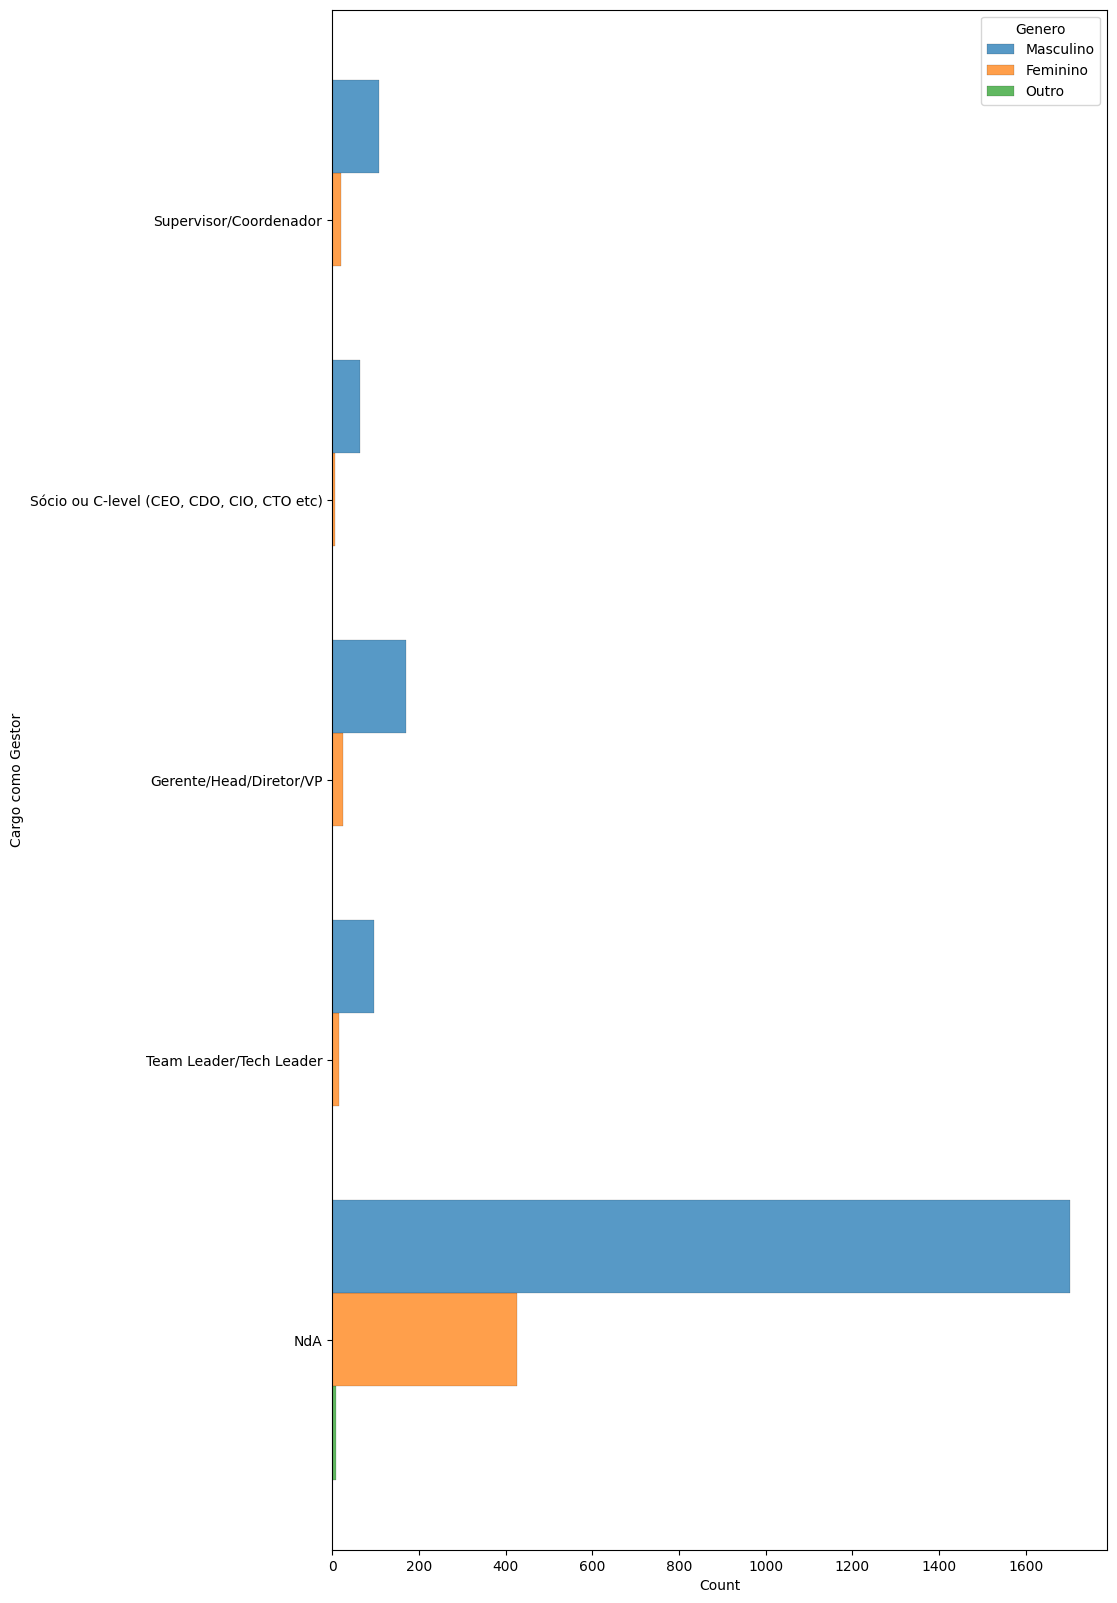

In [51]:
#Histograma cargos de gestão homens e mulheres

f, ax = plt.subplots(figsize=(10, 20))
sns.histplot(df,
             y="Cargo como Gestor", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)